In [1]:
# Import the relevant modules
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
from math import pi
import trackpy
from iris.time import PartialDateTime
import tobac
import warnings

In [2]:
# Import the libraries
import functions
import dictionaries

In [3]:
# Set up the warning messages
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

In [4]:
# Load the olr and precip data
olr, time_olr, datetimes_olr, con_olr = functions.load_olr_data(dictionaries.data_file)

# Load the precip data
precip, time_precip, datetimes_precip, con_precip = functions.load_precip_data(dictionaries.precip)

In [5]:
# Set up the directory to save the data
savedir, plot_dir = functions.setup_directories()

In [6]:
# Extract longitude and latitude
longitude,latitude=np.meshgrid(olr.coord('longitude').points,olr.coord('latitude').points)

# Calculate dxy
dxy, dt = functions.calculate_dxy(longitude, latitude, olr)

In [7]:
#sigma = dictionaries.sigma

#tf = (olr.data/sigma)**(0.25)
#tb_var = (-dictionaries.a + np.sqrt(dictionaries.a**2 + 4*dictionaries.b*tf.data))/(2*dictionaries.b)

In [8]:
# Calculate brightness temperatures
tf, tb_var, tb = functions.calculate_temperatures(dictionaries.a, dictionaries.b, dictionaries.sigma, olr)

In [9]:
# Set up the parameters dictionaries
# features parameters
parameters_features = functions.setup_parameters_features(dictionaries.position_threshold, dictionaries.sigma_threshold, dictionaries.target, dictionaries.threshold, dictionaries.n_min_threshold)

# segmentation parameters
parameters_segmentation = functions.setup_parameters_segmentation(dictionaries.target, dictionaries.method, dictionaries.threshold)

# linking parameters
parameters_linking = functions.setup_parameters_linking(dictionaries.n_min_threshold, dictionaries.stubs, dictionaries.order, dictionaries.extrapolate, dictionaries.memory, dictionaries.adaptive_stop, dictionaries.adaptive_step, dictionaries.subnetwork_size, dictionaries.method_linking)

In [10]:
# Now perform the sensitivity analysis
print("Values of threshold to be tested: ", dictionaries.threshold_values)
threshold_values=dictionaries.threshold_values

# Call the sensitivity analysis function
functions.perform_sensitivity_analysis(tb, savedir, parameters_features, parameters_segmentation, parameters_linking, threshold_values)

Frame 743: 11 trajectories present.
[ 9.74678603 15.59416267 13.5868483  11.00476986 20.754725   12.49010063
 12.88281009  7.34287206 11.73486435 12.37302939  5.44525553 18.35533946
 17.74958577  3.98008262  9.86470641 18.86534329  8.92680418 12.18145975
  8.08666484  4.87202252  9.59022863 13.55400559  4.73343477 23.65599045
 22.13030767 13.56610491 11.28828307 10.43999924  7.63859964  9.02819632
  9.04817166 16.20103354 11.14026328  9.79857707  8.83202791 11.12659871
 16.01739957 11.87003495  9.90269821 10.10430641 16.68222924 12.92654795
 10.95674503  8.49142513 13.49079251  3.33922964 12.00156421 11.13794728
 13.37188291  8.80357458 23.5813818   5.60377553 15.56821954  8.60153731
 21.65116672  9.95981394 15.62968926  8.71524474  5.60857863 14.93681181
  9.44492654 11.1939376  17.41733999 14.36095379 17.51806901  7.32503004
 15.27496431  6.73899732  7.25208606 11.4729703  14.51192063 14.71496455
 11.37747683 20.86085777 17.4001411   6.89478727 17.72111644  8.28936544
 15.73514991 13

,num_features,mean_area,max_area,min_area,num_tracks,mean_lifetime,max_lifetime,min_lifetime,mean_velocity,max_velocity,min_velocity,threshold
0,5361,117932.413461,4.943754e+05,43524.84375,256,11.742188,61.0,6.0,12.409157,36.893655,2.228263,225
1,6342,133713.871625,6.771898e+05,46071.00000,317,12.277603,61.0,6.0,12.931942,39.936306,1.668152,230
2,7114,151883.905571,8.079497e+05,43972.87500,333,13.039039,69.0,6.0,12.754653,40.913757,2.304766,235
3,7661,181792.437866,9.242935e+05,48055.78125,347,13.112392,93.0,6.0,12.719988,42.932120,2.703896,240
4,7718,191800.638272,9.153081e+05,49901.06250,341,13.170088,65.0,6.0,12.755797,42.894024,2.522872,241
5,7972,216733.998784,1.125940e+06,44884.12500,356,13.275281,81.0,6.0,12.641364,42.326986,2.651991,245


In [11]:
df = pd.read_csv('Save/Jul_1998/singleTb/sensitivity_analysis_singleTbThreshold.csv')

In [12]:
df

,num_features,mean_area,max_area,min_area,num_tracks,mean_lifetime,max_lifetime,min_lifetime,mean_velocity,max_velocity,min_velocity,threshold
0,5361,117932.413461,4.943754e+05,43524.84375,256,11.742188,61.0,6.0,12.409157,36.893655,2.228263,225
1,6342,133713.871625,6.771898e+05,46071.00000,317,12.277603,61.0,6.0,12.931942,39.936306,1.668152,230
2,7114,151883.905571,8.079497e+05,43972.87500,333,13.039039,69.0,6.0,12.754653,40.913757,2.304766,235
3,7661,181792.437866,9.242935e+05,48055.78125,347,13.112392,93.0,6.0,12.719988,42.932120,2.703896,240
4,7718,191800.638272,9.153081e+05,49901.06250,341,13.170088,65.0,6.0,12.755797,42.894024,2.522872,241
5,7972,216733.998784,1.125940e+06,44884.12500,356,13.275281,81.0,6.0,12.641364,42.326986,2.651991,245


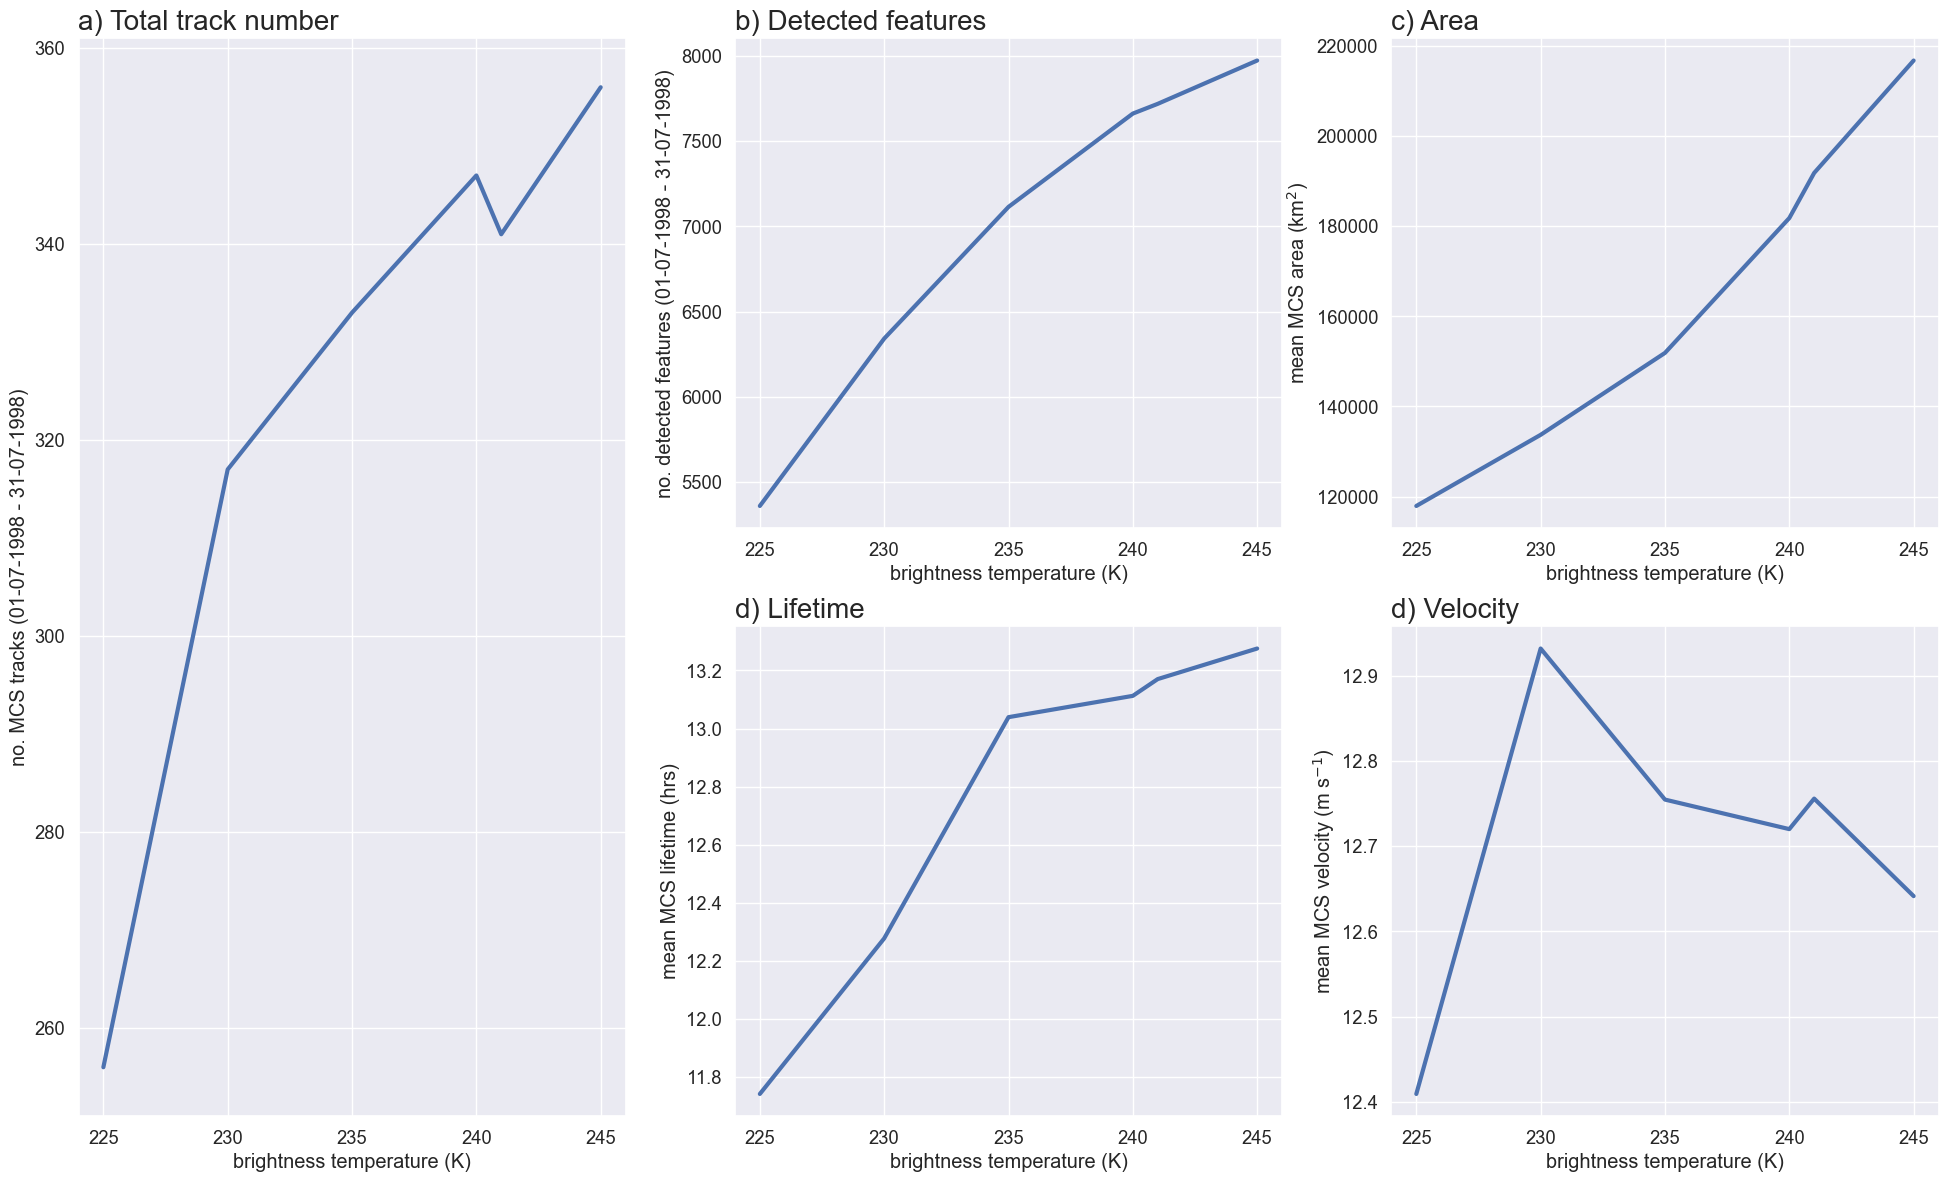

In [13]:
#plot of single Tb sensitivity analysis for MCSs
import seaborn as sns 
sns.set(font_scale=1.2)

plt.figure(figsize=(24,14))
f= 20
lf= 15

xticks=[225,230,235,240,245]
ax1=plt.subplot(2,3,(1,4))
ax1.set_title('a) Total track number ', loc='left', fontsize= f )
ax1.plot(df['threshold'],df['num_tracks'],linewidth=3)
ax1.set_xticks(xticks)
ax1.set_ylabel('no. MCS tracks (01-07-1998 - 31-07-1998)')
ax1.set_xlabel('brightness temperature (K)')

ax2=plt.subplot(2,3,2)
ax2.set_title('b) Detected features ', loc='left', fontsize= f )
ax2.plot(df['threshold'],df['num_features'],linewidth=3)
ax2.set_xticks(xticks)
ax2.set_ylabel('no. detected features (01-07-1998 - 31-07-1998)')
ax2.set_xlabel('brightness temperature (K)')

ax3=plt.subplot(2,3,3)
ax3.set_title('c) Area ', loc='left', fontsize= f )
ax3.plot(df['threshold'],df['mean_area'],linewidth=3)
ax3.set_xticks(xticks)
ax3.set_ylabel('mean MCS area (km$^{2}$)')
ax3.set_xlabel('brightness temperature (K)')

ax4=plt.subplot(2,3,5)
ax4.set_title('d) Lifetime ', loc='left', fontsize= f )
ax4.plot(df['threshold'],df['mean_lifetime'],linewidth=3)
ax4.set_xticks(xticks)
ax4.set_ylabel('mean MCS lifetime (hrs)')
ax4.set_xlabel('brightness temperature (K)')

ax5=plt.subplot(2,3,6)
ax5.set_title('d) Velocity ', loc='left', fontsize= f )
ax5.plot(df['threshold'],df['mean_velocity'],linewidth=3)
ax5.set_xticks(xticks)
ax5.set_ylabel('mean MCS velocity (m s$^{-1}$)')
ax5.set_xlabel('brightness temperature (K)')

plt.savefig('Plot/Jul_1998/singleTb/single_tb_analysis.png')


In [14]:
# #plot of nminthreshold sensitivity analysis for MCSs
# import seaborn as sns 
# sns.set(font_scale=1.2)

# plt.figure(figsize=(24,14))
# f= 20
# lf= 15

# xticks=[118,987,1481,1975,2469]
# ax1=plt.subplot(2,3,(1,4))
# ax1.set_title('a) Total track number ', loc='left', fontsize= f )
# ax1.plot(df['n_min_threshold'],df['num_tracks'],linewidth=3)
# ax1.set_xticks(xticks)
# ax1.set_ylabel('no. MCS tracks (01-01-2005 - 31-01-2005)')
# ax1.set_xlabel('minimum area threshold (km$^{2}$)')

# ax2=plt.subplot(2,3,2)
# ax2.set_title('b) Detected features ', loc='left', fontsize= f )
# ax2.plot(df['n_min_threshold'],df['num_features'],linewidth=3)
# ax2.set_xticks(xticks)
# ax2.set_ylabel('no. detected features (01-01-2005 - 31-01-2005)')
# ax2.set_xlabel('minimum area threshold (km$^{2}$)')

# ax3=plt.subplot(2,3,3)
# ax3.set_title('c) Area ', loc='left', fontsize= f )
# ax3.plot(df['n_min_threshold'],df['mean_area'],linewidth=3)
# ax3.set_xticks(xticks)
# ax3.set_ylabel('mean MCS area (km$^{2}$)')
# ax3.set_xlabel('minimum area threshold (km$^{2}$)')

# ax4=plt.subplot(2,3,5)
# ax4.set_title('d) Lifetime ', loc='left', fontsize= f )
# ax4.plot(df['n_min_threshold'],df['mean_lifetime'],linewidth=3)
# ax4.set_xticks(xticks)
# ax4.set_ylabel('mean MCS lifetime (hrs)')
# ax4.set_xlabel('minimum area threshold (km$^{2}$)')

# ax5=plt.subplot(2,3,6)
# ax5.set_title('d) Velocity ', loc='left', fontsize= f )
# ax5.plot(df['n_min_threshold'],df['mean_velocity'],linewidth=3)
# ax5.set_xticks(xticks)
# ax5.set_ylabel('mean MCS velocity (m s$^{-1}$)')
# ax5.set_xlabel('minimum area threshold (km$^{2}$)')

# plt.savefig('Plot/Jan_2005/nminthreshold/nminthreshold_analysis.png')
